In [9]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mping
import pickle
%matplotlib inline

In [10]:
def hist(img):
    # TO-DO: Grab only the bottom half of the image
    # Lane lines are likely to be mostly vertical nearest to the car
    bottom_half = img[img.shape[0]//2:,:]
    

    # TO-DO: Sum across image pixels vertically - make sure to set `axis`
    # i.e. the highest areas of vertical lines should be larger values
    histogram = np.sum(bottom_half, axis=0)
    
    return histogram

In [11]:
# Load test images.
testImages = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), 
                      glob.glob('./test_images/*.jpg')))

In [12]:
def perspective_transform_matrix(img, show_debug=False):
    img_size = img.shape[:2][::-1]
    print(img_size)
    src = np.float32(\
    [[(img_size[0] / 2) - 75, img_size[1] / 2 + 110],\
     [((img_size[0] / 6) - 10), img_size[1]],\
     [(img_size[0] * 5 / 6) + 60, img_size[1]],\
     [(img_size[0] / 2 + 75), img_size[1] / 2 + 110]]) 

    dst = np.float32(\
    [[(img_size[0] / 4), 0],\
     [(img_size[0] / 4), img_size[1]],\
     [(img_size[0] * 3 / 4), img_size[1]],\
     [(img_size[0] * 3 / 4), 0]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    if show_debug == True:
        print("source view point")
        print(src)
        print("Transformed view point")
        print(dst)

        plt.figure(figsize=(16, 16))
        plt.subplot(1, 2, 1)
        plt.imshow(img) 
        plt.plot(src[:,0], src[:,1], 'rx')
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        warped = cv2.warpPerspective(img, M, img_size)
        plt.imshow(warped) 
        plt.plot(dst[:,0], dst[:,1], 'rx')
        plt.title('Perspective Transformed Image')
    
    return M, Minv

(1280, 720)
source view point
[[  565.           470.        ]
 [  203.33332825   720.        ]
 [ 1126.66662598   720.        ]
 [  715.           470.        ]]
Transformed view point
[[ 320.    0.]
 [ 320.  720.]
 [ 960.  720.]
 [ 960.    0.]]


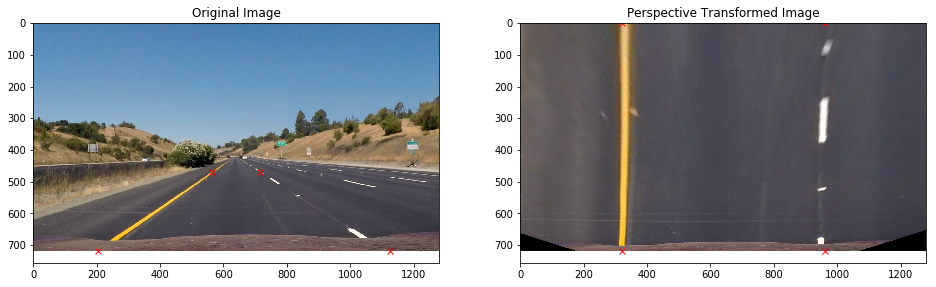

In [13]:
straightimage = mping.imread('test_images/straight_lines1.jpg')

M, Minv = perspective_transform_matrix(straightimage,show_debug=True)

In [8]:
def warpImage(img):
    img_size = img.shape[:2][::-1]
    
    M, Minv = perspective_transform_matrix(img)
    return cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

In [7]:
warped_images = list(map(warpImage, filted_binary))

showImages(warped_images, testImageList, ticksshow=False)

NameError: name 'filted_binary' is not defined